# Datahack 2021 Starter Code

This is the starter code for Datahack 2021. This code will help set you up. This notebook will contain basic data preprocessing, visualizations, and general best practices to help you get started exploring your data. Additionally, we will look at preprocessing some of the data as well.

## Exploratory Data Analysis (EDA)

Below we have included some libraries that you may find helpful for data exploration as well as a way for you to pull the data from the S3 bucket where it's being hosted. **We want to pop the Unnamed: 0 column. It represents the row number and is irrelevant as a feature.**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for this demo we just keep one-third of the data
data = pd.read_csv("OfficialCompetitionDataset.csv")
data.pop('Unnamed: 0')

print(f'data dimensions: {data.shape}')

data dimensions: (26504, 25)


### Viewing Headers

The first step in data exploration is to determine what the features represent as well as their type (continuous, categorical, etc.). The code below changes Pandas settings so that dataframes display all their columns (instead of omitting middle columns with ellipses) and displays the names of the columns with their data type.

In [2]:
pd.set_option('display.max_columns', None)
data.head()

name  \
0  A Forgotten Chapter In The History Of Ideas   
1         I Would Like to Write a Song That...   
2                             Awake On A Train   
3                                        Dress   
4                                   People Die   

                                  album              artist  auditory  \
0                                    VI  the fucking champs   0.24030   
1                                 Muted               alias   0.02061   
2  Yesterday Was Dramatic – Today Is OK                  mm   0.88200   
3                           Sylvan Esso         sylvan esso   2.57100   
4                             Travistan     travis morrison   0.22140   

   beats_per_measure  beats_per_min  concert_probability          critic  \
0                4.0        175.934                32.00    adam moerder   
1                4.0         97.017                24.40  william morris   
2                4.0        110.005                 9.99      matt lemay   
3                4.0        139.955                10.50       ian cohen   
4                3.0        144.033                35.00    chris dahlen   

   critic_rating  danceability  hotness      hype  instrumentalness  \
0           70.0      1.216527      1.0  0.627541          1.060468   
1           60.0      1.382647      0.6  0.575489          1.256408   
2           91.0      1.469614      4.0  0.498955          1.125781   
3           62.0      1.958150      8.8  0.456158         -0.844109   
4            0.0      2.377382      0.4  0.400788         -0.844077   

   length_minutes  lyricism major/minor    nplays  positivity  \
0          388200       8.0       major      5026   -0.676431   
1          252560       7.0       major      7823   -0.684217   
2          563253       3.0       major    161260    0.016498   
3          229840       9.0       minor  14379524   -0.964502   
4          262627       8.0       minor      4549    1.857820   

                                              review reviewer_type  \
0  \r\n    What an opportune time for a Fucking C...           NaN   
1  Listen up, kids; it's time for me to play like...           NaN   
2  Surprises are the best. Once, when I was in ki...   contributor   
3  There are bands that arrive fully formed with ...   contributor   
4  Travis Morrison got his ass kicked.  He tells ...           NaN   

   song_debut            styles tone    volume      vulgar  
0  2007-04-24              rock   C#  0.794281  NOT VULGAR  
1  2003-10-28  electronic, rock    D  0.760773  NOT VULGAR  
2  2005-10-04  electronic, rock    F  0.738168  NOT VULGAR  
3  2014-05-13           pop/r&b    F  0.824472  NOT VULGAR  
4        2004           pop/r&b    F  0.777020  NOT VULGAR

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26504 entries, 0 to 26503
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 26504 non-null  object 
 1   album                26504 non-null  object 
 2   artist               26504 non-null  object 
 3   auditory             26504 non-null  float64
 4   beats_per_measure    26504 non-null  float64
 5   beats_per_min        26504 non-null  float64
 6   concert_probability  26504 non-null  float64
 7   critic               26504 non-null  object 
 8   critic_rating        26504 non-null  float64
 9   danceability         26504 non-null  float64
 10  hotness              26504 non-null  float64
 11  hype                 26504 non-null  float64
 12  instrumentalness     26504 non-null  float64
 13  length_minutes       26504 non-null  int64  
 14  lyricism             26504 non-null  float64
 15  major/minor          26504 non-null 

### Dealing with Missing Data

As the above output shows, some data rows have null values for some of the features. We see the number of rows missing each feature below.

In [4]:
data.isnull().sum()

name                      0
album                     0
artist                    0
auditory                  0
beats_per_measure         0
beats_per_min             0
concert_probability       0
critic                    0
critic_rating             0
danceability              0
hotness                   0
hype                      0
instrumentalness          0
length_minutes            0
lyricism                  0
major/minor               0
nplays                    0
positivity                0
review                    0
reviewer_type          6165
song_debut                0
styles                 1691
tone                      0
volume                    0
vulgar                    0
dtype: int64

The column with the most missing data is reviewer_type. Since it's a categorical value, we plot the distribution of its values and fill the missing rows with the majority class.

<AxesSubplot:title={'center':'Bar chart of classes'}, xlabel='reviewer_type', ylabel='Count'>

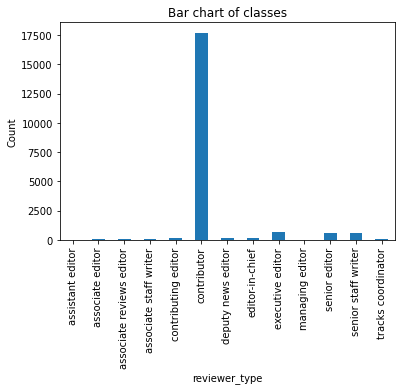

In [5]:
groups = data.groupby('reviewer_type')
plt.ylabel("Count")
plt.title("Bar chart of classes")
groups.size().plot.bar()

The value "contributor" appears by far the most often, so we replace None values with it. 

In [6]:
data["reviewer_type"].fillna("contributor", inplace=True) 

In [7]:
data.isnull().sum()

name                      0
album                     0
artist                    0
auditory                  0
beats_per_measure         0
beats_per_min             0
concert_probability       0
critic                    0
critic_rating             0
danceability              0
hotness                   0
hype                      0
instrumentalness          0
length_minutes            0
lyricism                  0
major/minor               0
nplays                    0
positivity                0
review                    0
reviewer_type             0
song_debut                0
styles                 1691
tone                      0
volume                    0
vulgar                    0
dtype: int64

We see that some styles are missing as well. The following are some different ideas for dealing with the missing rows:
* Just remove rows that are missing. 
* Drop the style column so you don't have to remove any rows.
* One more involved idea would be to train a classifier on the data containing the feature and using the trained model to predict missing values.

For demo purposes we just remove rows missing style.

In [8]:
data.dropna(subset = ["styles"], inplace=True)
data.isnull().sum()

name                   0
album                  0
artist                 0
auditory               0
beats_per_measure      0
beats_per_min          0
concert_probability    0
critic                 0
critic_rating          0
danceability           0
hotness                0
hype                   0
instrumentalness       0
length_minutes         0
lyricism               0
major/minor            0
nplays                 0
positivity             0
review                 0
reviewer_type          0
song_debut             0
styles                 0
tone                   0
volume                 0
vulgar                 0
dtype: int64

### Visualizations

Boxplots are useful for outlier detection. Here we can see that there are a few outliers in the "hotness" of hit songs. This makes sense as most songs are not well-known and only a small number become very popular.

<AxesSubplot:>

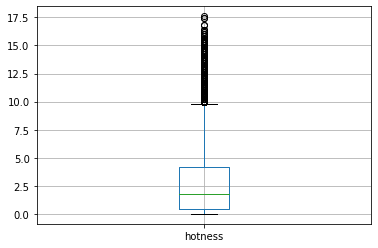

In [9]:
data.boxplot(["hotness"])

Here we can see that most songs are not really that popular. As we expect, the relationship is heavily skewed.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


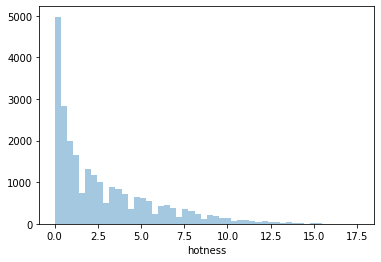

In [10]:
sns.distplot(data['hotness'], kde=False)
plt.show()

Here we can observe the correlations in our data. We see that some variables such and loudness and energy are highly correlated. This information can be used to remove redundant features to reduce overfitting when building a model.

<AxesSubplot:>

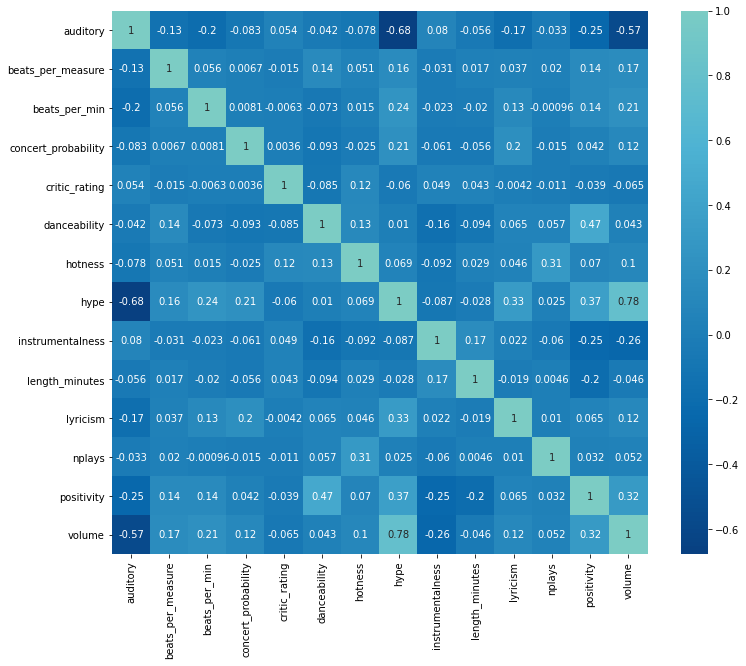

In [11]:
correlations = data.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)

Here we have a pairwise plots, which plot the relationship between every pair of features in the data. These may reveal some interesting relationships between features that you could include in your data analysis.

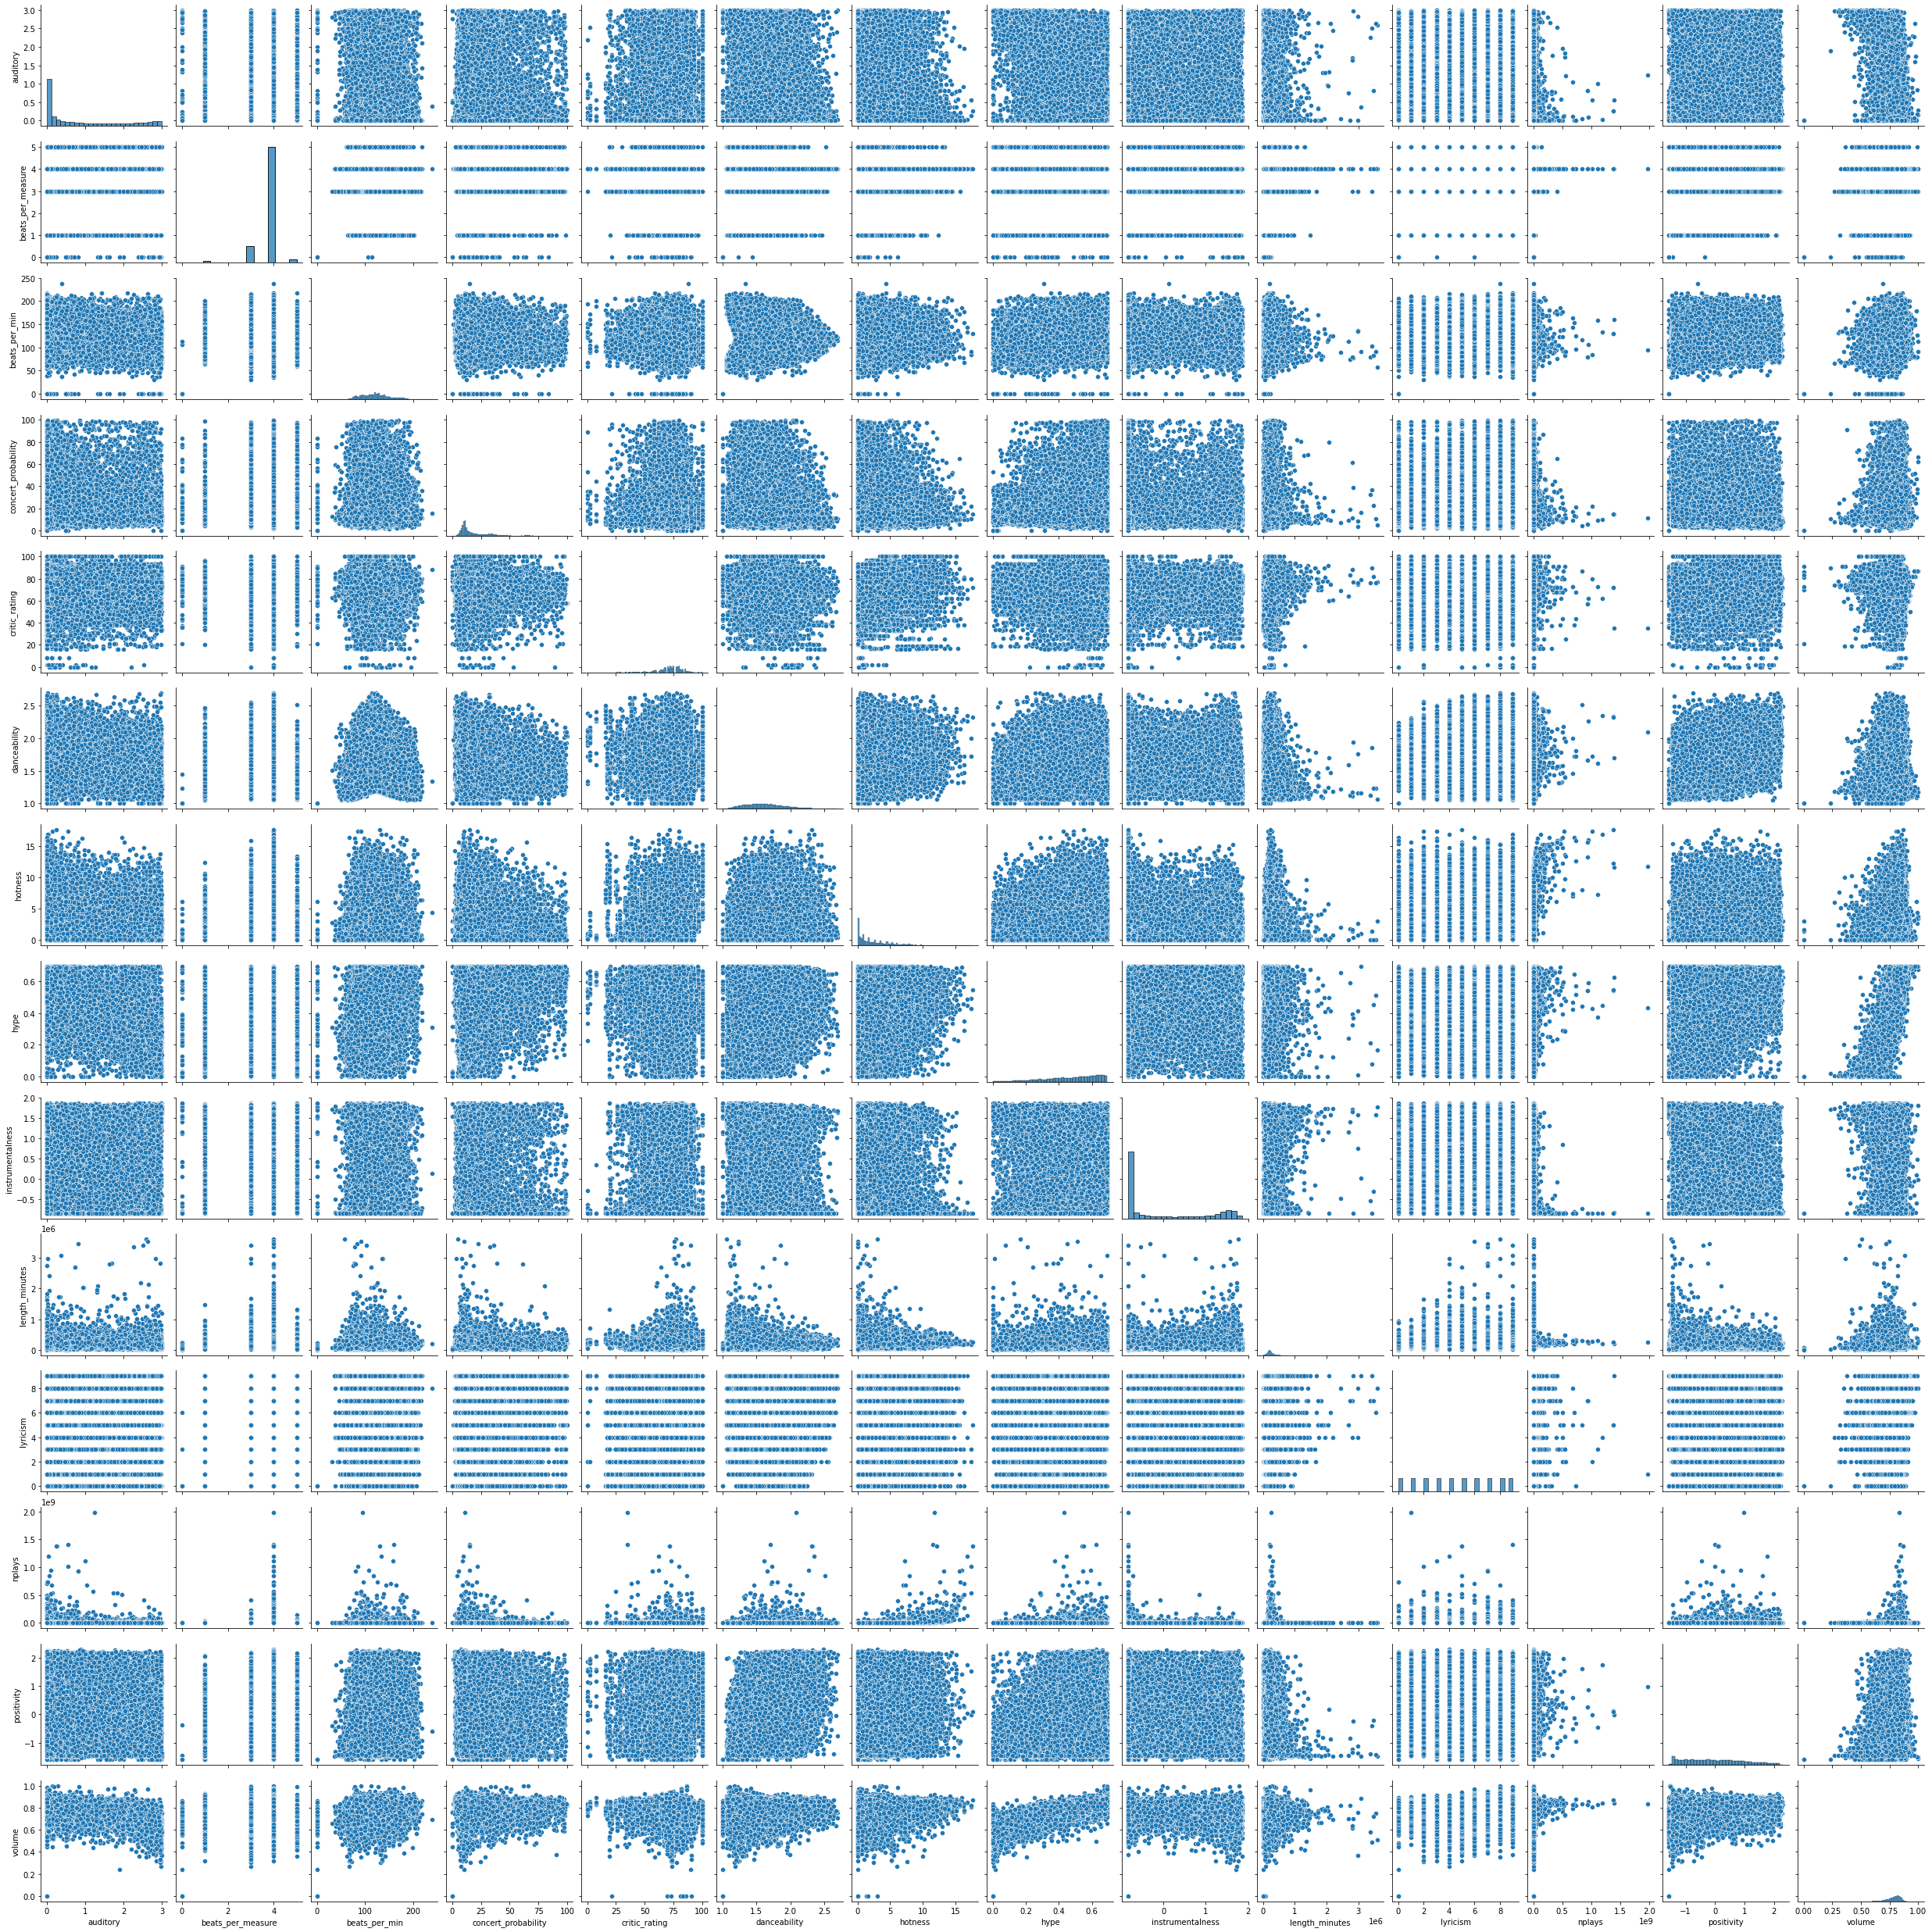

In [12]:
sns.pairplot(data)

### Text Features

We do not delve into text preprocessing much in this demo, but 'review' is the only long-form text feature provided in the dataset. There are a number of ways in which numerical features can be constructed from text, such as n-grams and part-of-speech-based count/binary vectors. 

## Building a Simple Model

We now show how to build a simple model for tone classification. Trying to classify the key of a song isn't a wortwhile prediction task, but we pursue it for demonstration's sake. It's up to you to come up with something more useful!

Our first step is to normalize all numerical variables to lie in the interval [0,1]. Feature normalization improves the performance of some machine-learning algorithms, especially distance-based ones like k-nearest neighbors. In any case, it's good practice.

In [13]:
numerical_cols = ['auditory', 'beats_per_measure', 'beats_per_min', 'concert_probability',
                 'critic_rating', 'danceability', 'hotness', 'hype', 'instrumentalness', 'length_minutes',
                 'lyricism', 'nplays', 'positivity', 'volume']

for col in numerical_cols:
    data[col] = (data[col]-data[col].min()) / (data[col].max() - data[col].min()) 

For demo purposes we get rid of most categorical variables.

In [14]:
ignore_cols = ['name', 'album', 'artist', 'critic', 'review', 'reviewer_type', 'song_debut', 'styles']
for col in ignore_cols:
    data.pop(col)

The only remaining categorical variables are 'major/minor' and 'vulgar'. We convert these features into numerical binary ones.

In [15]:
categorical_cols = ['major/minor', 'vulgar']
data = pd.get_dummies(data, columns=categorical_cols)

Our final step is to remove the tone column and use it as our target vector in the training process.

In [16]:
y = data.pop('tone')

In [17]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

We now train a logistic regression classifier on the data. We first make an 80-20 train-test split, then train on the train split, and finally evaluate our model on the test split.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.1769091275438243


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As expected, the model does an awful (though better than random) job of classifying the tone of songs, since the key to which a song is set probably has little to do with the features given to the model. However, the rudimentary code we have provided here can easily be modified to create new classifiers with more advanced feature engineering.

## Juan's Additions
### Goal: Predict nplays from non-review data

In [20]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score, mean_absolute_error
from scipy import stats

nltk.download('vader_lexicon')

df = pd.read_csv("OfficialCompetitionDataset.csv")
df.dropna(subset = ["styles"], inplace=True)
df.drop(['review', 'reviewer_type', 'song_debut', 'Unnamed: 0', 'critic', 'critic_rating', 'hotness'], axis=1, inplace=True)
df.columns

NameError: name 'nltk' is not defined

In [ ]:
text_features = ['name', 'album', 'artist']
sia = nltk.sentiment.SentimentIntensityAnalyzer()
for f in text_features:
    df[f'{f}_len'] = df[f'{f}'].str.len()
    df[f'{f}_upper'] = df[f'{f}'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    df[f'{f}_sent_pos'] = df[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
    df[f'{f}_sent_neg'] = df[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
    
df.drop(['name', 'album', 'artist'], axis=1, inplace=True)
df.head()

In [ ]:
X = df.drop('nplays', axis=1)
y = df['nplays']
y = np.log1p(y)

categorical_cols = ['major/minor', 'vulgar', 'tone', 'styles']
X = pd.get_dummies(X, columns=categorical_cols)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Baseline model
mean_train = np.mean(y_train)
baseline_predictions = np.ones(y_test.shape) * mean_train
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
rmse_baseline = np.sqrt(MSE(y_test, baseline_predictions))
r2 = r2_score(y_test, baseline_predictions)
print("MAE : % f" %(mae_baseline))
print("RMSE : % f" %(rmse))
print("R2 Score : % f" %(r2))

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth':8,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50
)

print("Best RMSE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

pred = model.predict(dtest)
rmse = np.sqrt(MSE(y_test, pred))
r2 = r2_score(y_test, pred)
print("RMSE : % f" %(rmse))
print("R2 Score : % f" %(r2))

In [ ]:
df.columns

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
data = pd.read_csv("OfficialCompetitionDataset.csv")
sia = nltk.sentiment.SentimentIntensityAnalyzer()

f = 'review'
data[f'{f}_sent_pos'] = data[f'{f}'].apply(lambda x: sia.polarity_scores(x)['pos'])
data[f'{f}_sent_neg'] = data[f'{f}'].apply(lambda x: sia.polarity_scores(x)['neg'])
data.head()

Unnamed: 0                                         name  \
0       21803  A Forgotten Chapter In The History Of Ideas   
1       20617         I Would Like to Write a Song That...   
2        8523                             Awake On A Train   
3        4018                                        Dress   
4       20834                                   People Die   

                                  album              artist  auditory  \
0                                    VI  the fucking champs   0.24030   
1                                 Muted               alias   0.02061   
2  Yesterday Was Dramatic – Today Is OK                  mm   0.88200   
3                           Sylvan Esso         sylvan esso   2.57100   
4                             Travistan     travis morrison   0.22140   

   beats_per_measure  beats_per_min  concert_probability          critic  \
0                4.0        175.934                32.00    adam moerder   
1                4.0         97.017                24.40  william morris   
2                4.0        110.005                 9.99      matt lemay   
3                4.0        139.955                10.50       ian cohen   
4                3.0        144.033                35.00    chris dahlen   

   critic_rating  danceability  hotness      hype  instrumentalness  \
0           70.0      1.216527      1.0  0.627541          1.060468   
1           60.0      1.382647      0.6  0.575489          1.256408   
2           91.0      1.469614      4.0  0.498955          1.125781   
3           62.0      1.958150      8.8  0.456158         -0.844109   
4            0.0      2.377382      0.4  0.400788         -0.844077   

   length_minutes  lyricism major/minor    nplays  positivity  \
0          388200       8.0       major      5026   -0.676431   
1          252560       7.0       major      7823   -0.684217   
2          563253       3.0       major    161260    0.016498   
3          229840       9.0       minor  14379524   -0.964502   
4          262627       8.0       minor      4549    1.857820   

                                              review reviewer_type  \
0  \r\n    What an opportune time for a Fucking C...           NaN   
1  Listen up, kids; it's time for me to play like...           NaN   
2  Surprises are the best. Once, when I was in ki...   contributor   
3  There are bands that arrive fully formed with ...   contributor   
4  Travis Morrison got his ass kicked.  He tells ...           NaN   

   song_debut            styles tone    volume      vulgar  review_sent_pos  \
0  2007-04-24              rock   C#  0.794281  NOT VULGAR            0.132   
1  2003-10-28  electronic, rock    D  0.760773  NOT VULGAR            0.148   
2  2005-10-04  electronic, rock    F  0.738168  NOT VULGAR            0.184   
3  2014-05-13           pop/r&b    F  0.824472  NOT VULGAR            0.128   
4        2004           pop/r&b    F  0.777020  NOT VULGAR            0.108   

   review_sent_neg  
0            0.076  
1            0.086  
2            0.073  
3            0.042  
4            0.124

In [31]:
print(data['lyricism'].unique())

[8. 7. 3. 9. 1. 5. 2. 6. 4. 0.]


<AxesSubplot:>

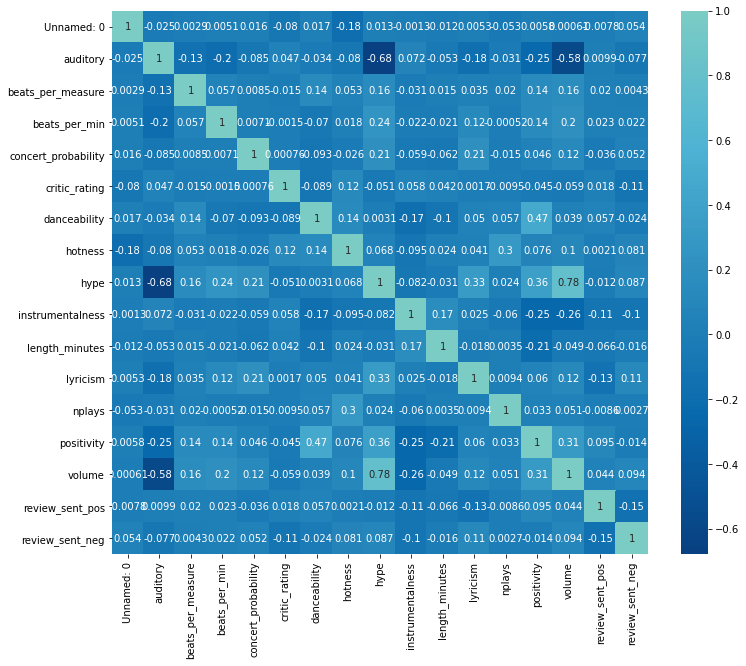

In [30]:
correlations = data.corr()
fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)